##### Application Flow
Before proceeding with the algorithm, let’s first discuss the lifecycle of any machine learning model. This diagram explains the creation of a Machine Learning model from scratch and then taking the same model further with hyperparameter tuning to increase its accuracy, deciding the deployment strategies for that model and once deployed setting up the logging and monitoring frameworks to generate reports and dashboards based on the client requirements. A typical lifecycle diagram for a machine learning model looks like:



##### Bayes’s Theorem
According to the Wikipedia, In probability theory and statistics,Bayes’s theorem (alternatively Bayes’s law or Bayes’s rule) describes the probability of an event, based on prior knowledge of conditions that might be related to the event. Mathematically, it can be written as:


Where A and B are events and P(B)≠0

P(A|B) is a conditional probability: the likelihood of event A occurring given that B is true.


P(B|A) is also a conditional probability: the likelihood of event B occurring given that A is true.


P(A) and P(B) are the probabilities of observing A and B respectively; they are known as the marginal probability.

Let’s understand it with the help of an example:

##### The problem statement:

There are two machines which manufacture bulbs. Machine 1 produces 30 bulbs per hour and machine 2 produce 20 bulbs per hour. Out of all bulbs produced, 1 % turn out to be defective. Out of all the defective bulbs, the share of each machine is 50%. What is the probability that a bulb produced by machine 2 is defective?

We can write the information given above in mathematical terms as:

The probability that a bulb was made by Machine 1, P(M1)=30/50=0.6

The probability that a bulb was made by Machine 2, P(M2)=20/50=0.4

The probability that a bulb is defective, P(Defective)=1%=0.01

The probability that a defective bulb came out of Machine 1, P(M1 | Defective)=50%=0.5

The probability that a defective bulb came out of Machine 2, P(M2 | Defective)=50%=0.5

Now, we need to calculate the probability of a bulb produced by machine 2 is defective i.e., P(Defective | M2). Using the Bayes Theorem above, it can be written as:

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skl
sns.set()

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/npradaschnor/Pima-Indians-Diabetes-Dataset/master/diabetes.csv") # Reading the Data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
# replacing zero values with the mean of the column
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [5]:
# Handling the Outliers

q = data['Pregnancies'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data[data['Pregnancies']<q]
q = data_cleaned['BMI'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['BMI']<q]
q = data_cleaned['SkinThickness'].quantile(0.99)
# we are removing the top 1% data from the SkinThickness column
data_cleaned  = data_cleaned[data_cleaned['SkinThickness']<q]
q = data_cleaned['Insulin'].quantile(0.95)
# we are removing the top 5% data from the Insulin column
data_cleaned  = data_cleaned[data_cleaned['Insulin']<q]
q = data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
# we are removing the top 1% data from the DiabetesPedigreeFunction column
data_cleaned  = data_cleaned[data_cleaned['DiabetesPedigreeFunction']<q]
q = data_cleaned['Age'].quantile(0.99)
# we are removing the top 1% data from the Age column
data_cleaned  = data_cleaned[data_cleaned['Age']<q]

C:\Users\Balodi\AppData\Local\Temp\ipykernel_15384\762150393.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
C:\Users\Balodi\AppData\Local\Temp\ipykernel_15384\762150393.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
C:\Users\Balodi\AppData\Lo

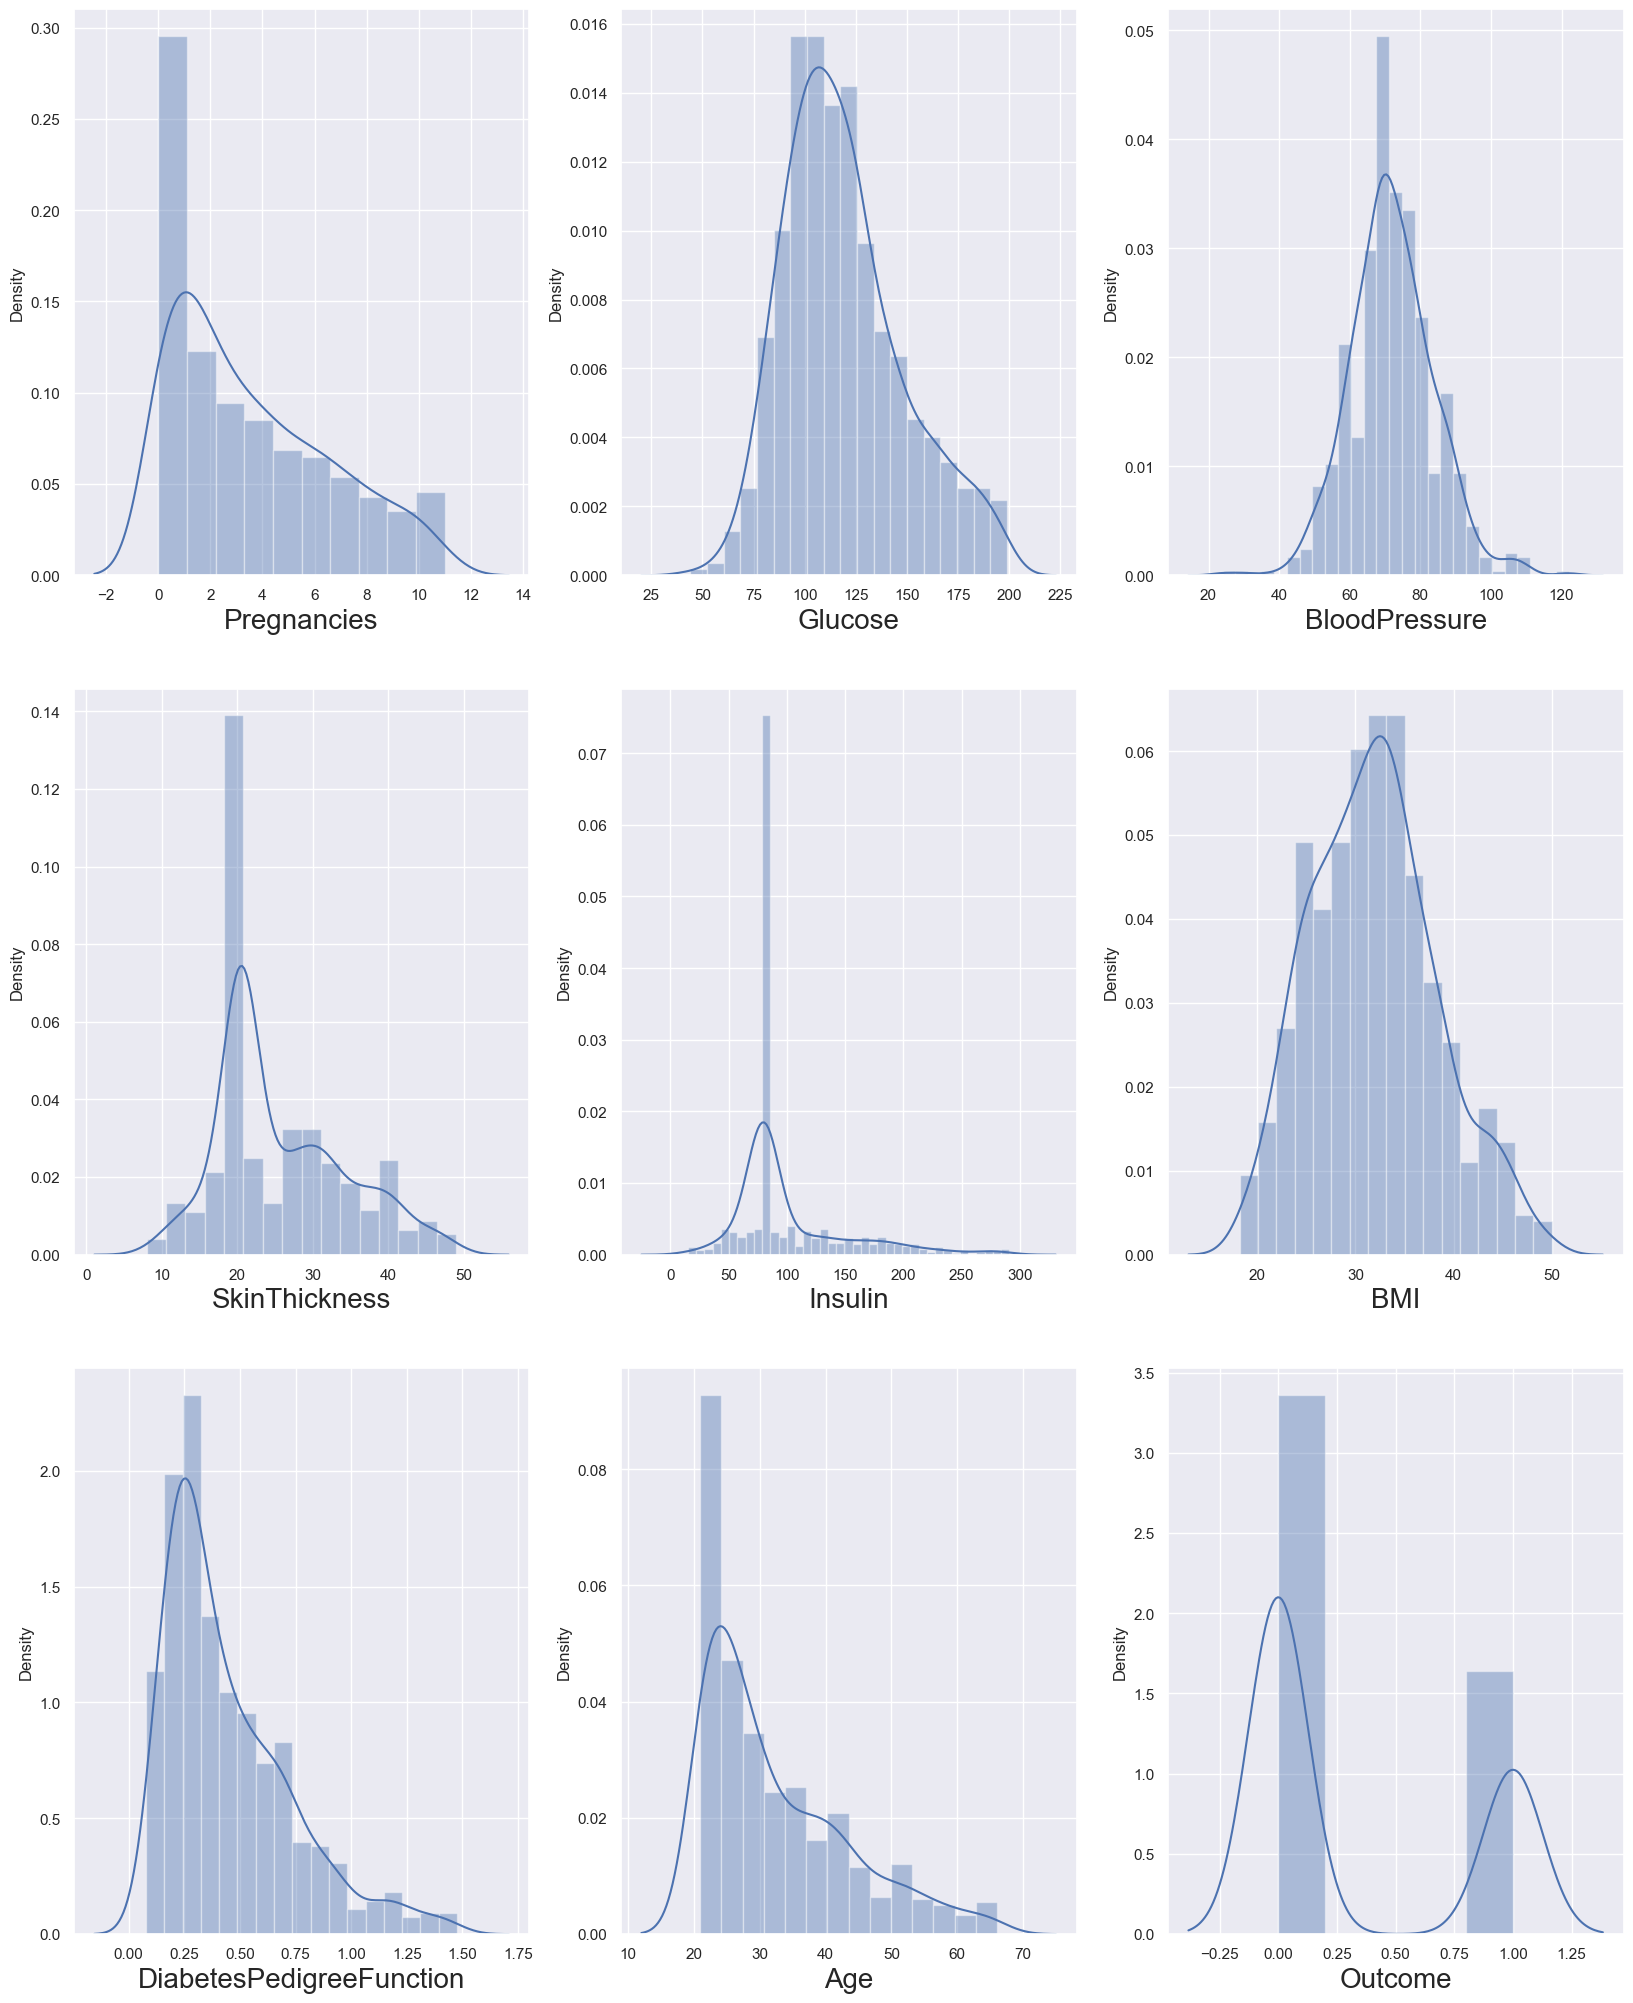

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [7]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

In [8]:
# we need to scale our data as well

scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [9]:
# This is how our data looks now after scaling.
X_scaled

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.16725546,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.85153454,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01597855, -0.68176235, ..., -1.33182125,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.90975111,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.34213954,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.29847711,
        -0.47378505, -0.87137393]])

In [10]:
# now we will check for multicollinearity using VIF(Variance Inflation factor)
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.431075,Pregnancies
1,1.347308,Glucose
2,1.247914,BloodPressure
3,1.450510,SkinThickness
4,1.262111,Insulin
5,1.550227,BMI
6,1.058104,DiabetesPedigreeFunction
7,1.605441,Age


+ All the VIF values are less than 5 and are very low. That means no multicollinearity. Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25, random_state = 355)

In [12]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [13]:
model.fit(x_train,y_train)

GaussianNB()

In [14]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)
    
with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

In [15]:
y_pred = model.predict(x_test)

In [16]:
accuracy_score(y_test, y_pred)*100

78.64583333333334

In [17]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[109,  16],
       [ 25,  42]], dtype=int64)

In [18]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [19]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7864583333333334

In [20]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.872

In [22]:
# Area Under Curve
auc = roc_auc_score(y_test, y_pred)
auc

0.7494328358208956

So far we have been doing grid search to maximise the accuracy of our model. Here, we’ll follow a different approach. We’ll create two models, one with Logistic regression and other with Naïve Bayes and we’ll compare the AUC. The algorithm having a better AUC shall be considered for production deployment.

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

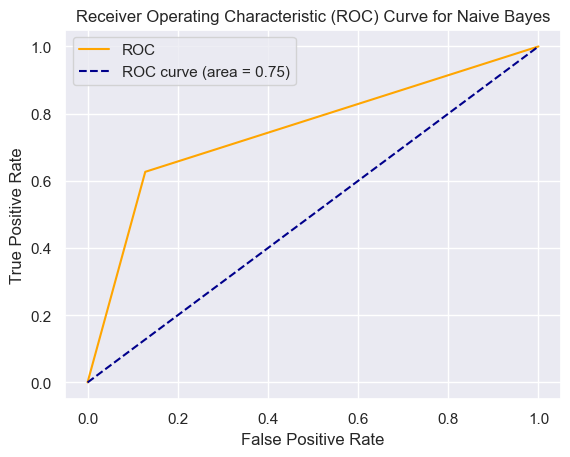

In [25]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Naive Bayes')
plt.legend()
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred_logistic = log_reg.predict(x_test)

In [28]:
accuracy_logistic = accuracy_score(y_test,y_pred_logistic)
accuracy_logistic

0.7552083333333334

In [29]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred_logistic)
conf_mat

array([[110,  15],
       [ 32,  35]], dtype=int64)

In [30]:
# ROC
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, y_pred_logistic)

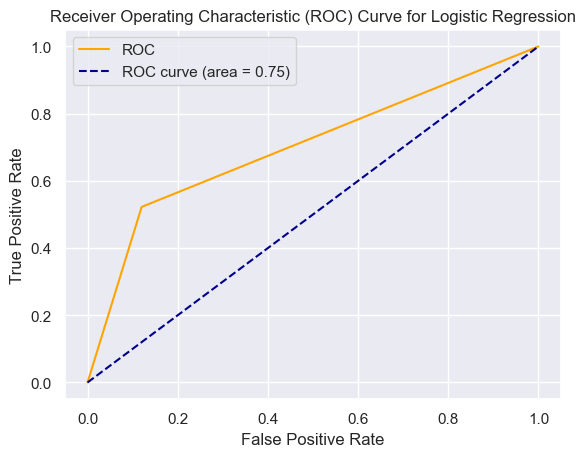

In [31]:
plt.plot(fpr_logistic, tpr_logistic, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend()
plt.show()

In [32]:
from sklearn.metrics  import roc_auc_score

In [33]:
auc_naive=roc_auc_score(y_test,y_pred)
auc_naive

0.7494328358208956

In [34]:
auc_logistic=roc_auc_score(y_test,y_pred_logistic)
auc_logistic

0.7011940298507463

Here, you can see that the AUC for Naïve Bayes is more. So, we’ll take that as our production-ready model.

+ Advantages:

Naive Bayes is extremely fast for both training and prediction as they not have to learn to create separate classes.

Naive Bayes provides a direct probabilistic prediction.

Naive Bayes is often easy to interpret.

Naive Bayes has fewer (if any) parameters to tune


+ Disadvantages:

The algorithm assumes that the features are independent which is not always the scenario

Zero Frequency i.e. if the category of any categorical variable is not seen in training data set even once then model assigns a 

zero probability to that category and then a prediction cannot be made.